# house Price Prediction 

# Import the required libraries for Linear Regression

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [3]:
sns.set_style("whitegrid")

In [6]:
pwd

'C:\\Users\\stayclassy\\Machine Learning\\ML PROJECT'

In [5]:
cd C:\Users\stayclassy\Desktop\python\Machine Learning\L Rigression\Project

C:\Users\stayclassy\Desktop\python\Machine Learning\L Rigression\Project


In [6]:
df = pd.read_csv("melbourne_housing.csv")

In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [20]:
df.shape

(34857, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [21]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [9]:
df["Price"]==np.nan

0        False
1        False
2        False
3        False
4        False
         ...  
34852    False
34853    False
34854    False
34855    False
34856    False
Name: Price, Length: 34857, dtype: bool

In [78]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# exploring data column to column

In [46]:
df["Suburb"].unique(),df["Suburb"].nunique()

(array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
        'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
        'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
        'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
        'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
        'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
        'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
        'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
        'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
        'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
        'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
        'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
        'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
        'Kew East', 'Kooyong'

In [93]:
df.groupby('Suburb')['Suburb'].count()

Suburb
Abbotsford      137
Aberfeldie       80
Airport West    162
Albanvale        14
Albert Park     131
               ... 
Yallambie        50
Yarra Glen        1
Yarraville      304
croydon           1
viewbank          1
Name: Suburb, Length: 350, dtype: int64

In [47]:
df["Price"].unique()

array([     nan, 1480000., 1035000., ..., 2685000., 1671000., 1605500.])

In [48]:
df["Rooms"].unique(),df["Rooms"].nunique()

(array([ 2,  3,  4,  1,  5,  6,  7,  8, 10,  9, 12, 16], dtype=int64), 12)

In [94]:
df.groupby('Rooms')['Rooms'].count()

Rooms
1      1479
2      8330
3     15082
4      7956
5      1737
6       204
7        32
8        19
9         4
10        6
12        3
Name: Rooms, dtype: int64

In [50]:
df['Type'].unique()

(array(['h', 'u', 't'], dtype=object), 3)

In [65]:
df['BuildingArea'].unique()

array([         nan, 7.900000e+01, 1.500000e+02, 1.420000e+02,
       2.200000e+02, 2.100000e+02, 8.200000e+01, 1.470000e+02,
       1.070000e+02, 7.500000e+01, 8.000000e+01, 1.900000e+02,
       9.400000e+01, 9.700000e+01, 1.290000e+02, 1.100000e+02,
       1.050000e+02, 7.300000e+01, 1.350000e+02, 1.670000e+02,
       2.700000e+01, 6.000000e+01, 8.500000e+01, 1.740000e+02,
       5.000000e+01, 1.280000e+02, 1.800000e+01, 1.240000e+02,
       9.100000e+01, 8.100000e+01, 2.250000e+02, 1.450000e+02,
       1.140000e+02, 8.400000e+01, 1.340000e+02, 1.160000e+02,
       8.600000e+01, 1.270000e+02, 1.860000e+02, 9.000000e+01,
       1.330000e+02, 1.300000e+02, 1.130000e+02, 1.000000e+02,
       3.090000e+02, 1.920000e+02, 1.260000e+02, 1.010000e+02,
       1.020000e+02, 7.600000e+01, 1.460000e+02, 1.980000e+02,
       1.800000e+02, 1.250000e+02, 1.590000e+02, 1.220000e+02,
       8.800000e+01, 1.810000e+02, 1.170000e+02, 9.800000e+01,
       8.300000e+01, 2.540000e+02, 1.230000e+02, 1.1900

In [64]:
df['YearBuilt'].unique()

array([  nan, 1900., 2014., 2006., 1910., 2009., 1860., 1890., 1925.,
       2005., 2010., 1880., 1985., 1970., 2013., 2012., 1920., 1950.,
       1998., 1930., 2016., 1965., 1960., 1980., 2011., 2015., 1975.,
       1993., 2003., 1995., 1996., 2000., 1990., 1915., 2004., 2008.,
       1916., 1962., 1955., 1988., 1953., 1997., 2007., 1967., 1964.,
       1889., 1888., 1934., 1966., 1935., 1969., 1940., 1938., 1887.,
       1904., 1972., 1978., 1939., 1945., 1927., 1948., 1947., 1968.,
       1958., 2017., 1999., 1992., 1961., 1928., 1977., 1919., 1976.,
       2001., 1926., 1981., 1986., 1943., 1974., 1956., 1936., 1957.,
       1987., 2002., 1952., 1994., 1949., 1905., 1912., 1924., 1885.,
       1923., 1918., 1991., 1942., 1973., 2018., 1982., 2106., 1971.,
       1963., 1931., 1897., 1906., 1883., 1989., 1983., 1937., 1903.,
       1913., 1830., 1895., 1908., 1917., 1902., 1854., 1850., 1898.,
       1941., 1951., 1946., 1984., 1901., 1921., 1929., 1959., 1979.,
       1892., 1933.,

In [96]:
df.groupby('YearBuilt')['YearBuilt'].count()

YearBuilt
1196      1
1800      1
1820      1
1830      1
1850      4
       ... 
2016    130
2017     82
2018      4
2019      1
2106      1
Name: YearBuilt, Length: 160, dtype: int64

In [79]:
df['Landsize'].unique()

array([ 126.,  202.,  156., ..., 1098., 1109., 1163.])

In [51]:
df['Method'].unique()

(array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object), 12)

In [53]:
df['Bedroom2'].unique()

array([ 2.,  3.,  4.,  6., nan,  1.,  5.,  7.,  0.,  8.,  9., 30., 20.,
       10., 16., 12.])

In [54]:
df['Bathroom'].unique()

array([ 1.,  2., nan,  3.,  7.,  4.,  0.,  5.,  6., 12.,  8.,  9.])

In [97]:
df.groupby('Bathroom')['Bathroom'].count()

Bathroom
0        46
1     19429
2     12531
3      2468
4       272
5        82
6        16
7         4
8         2
9         1
12        1
Name: Bathroom, dtype: int64

In [55]:
df['Car'].unique()

array([ 1.,  0.,  2., nan,  6.,  5.,  4.,  3.,  8.,  7., 11., 26.,  9.,
       10., 18., 12.])

In [98]:
df.groupby('Car')['Car'].count()

Car
0      1631
1     12554
2     17509
3      1642
4      1161
5       154
6       140
7        25
8        22
9         3
10        6
11        2
12        1
18        1
26        1
Name: Car, dtype: int64

In [63]:
df['Distance'].unique()

array([ 2.5, 13.5,  3.3,  6.4, 13.8, 11.1,  6.3,  5.9, 11. , 12.2, 10.5,
        6.6,  9.7,  9.2, 13. , 13.9, 13.1, 10.8, 11.2, 10.7,  5.2, 11.8,
       11.7,  7.8,  9. ,  3.2, 11.4,  8.9,  8.1,  9.3, 13.6,  3.4,  1.6,
       10.3,  8.5,  7.7,  8. ,  9.4,  5.8,  3.5,  4.4, 12.1, 13.7, 14.5,
        4.6,  7.9, 15. , 12.8,  4.2,  5.6,  7.5,  6.2,  7.4,  8.7,  2.8,
        4.1,  6.9, 14.6,  8.4,  2.3,  5.5, 11.5, 14.7,  2.6,  9.9,  3.8,
        4.5,  8.8,  2.1,  1.2,  6.1, 12.6, 13.3,  6.5, 14.9,  1.9,  5.1,
        7. ,  9.1,  9.5,  1.8,  1.5,  9.8, 12.4, 10.6,  8.2, 10.9, 10.4,
       14. , 12.5,  5.3, 12.7,  3.7,  3. ,  5.7, 15.5,  4.3, 10.2, 16.5,
       23.2, 17.3, 35.2, 13.4, 25. , 16.1,  4. , 14.8, 10.1, 17.9, 17.5,
       16.7,  3.6, 43.4,  6.7, 20.6, 34.7, 23. , 24.7, 21.8, 22.2, 14.3,
       25.9,  1.3, 27. , 18. ,  7.2, 36.9, 19.6, 28.8, 24.8, 15.4, 38. ,
       45.9, 12.9,  7.3, 20.4, 32.3, 45.2, 21.3, 16. , 18.4, 12.3,  5.4,
       25.2, 16.3, 33.8, 31.7, 29.8, 20. , 17.2, 16

In [56]:
df['Propertycount'].unique()

array([ 4019.,  3464.,  3280.,  2211.,  5301.,  5132.,  4836.,  6567.,
        3052.,  2894.,  4502.,  2952.,  5682.,  7809.,  6795., 10969.,
        4605.,  3589., 10579.,  6938., 11918.,  7082.,  4480.,  5678.,
        8920.,  3265.,  3106.,  7822.,  2379.,  6923.,  5051.,  3582.,
        2954., 11204.,  3445.,  4553.,  9028.,  1651.,  4898.,  8989.,
        9264.,  1308.,  2970.,  5825.,  6244.,  3593.,  7570., 10412.,
        8870.,  1071.,  2606.,  5454.,  2356., 11308.,  2947.,  2674.,
        3145.,  5549.,  1202.,  5629.,  5263., 10331.,  2671.,   394.,
        3873.,  4675.,  8801.,  4918., 17496.,  2019.,  2079.,  6232.,
        2555.,  5498.,  2291.,  6821., 11364.,  2651.,  3692.,  2309.,
        7485.,  8648.,  7717., 14577., 21650., 14949.,  3540.,  2417.,
        5943., 14887.,  8400.,  1223., 13240.,  3284.,  3755.,  4217.,
        6763.,  5457.,  5420.,  7217.,  2698.,  2329.,  2230.,  6380.,
         802.,  4380.,  1369.,  6543.,  1543.,   790.,  5533.,   438.,
      

In [99]:
df.groupby('Propertycount')['Propertycount'].count()

Propertycount
83         1
121        1
129        1
242        1
249        5
        ... 
17055    123
17093     47
17384     20
17496    204
21650    844
Name: Propertycount, Length: 342, dtype: int64

In [ ]:
### drponig Duplicates values

In [6]:
df.drop_duplicates(inplace=True)

In [59]:
df.shape    # 1 duplicate value found and drop

(34856, 21)

In [ ]:
### separating date column into day,month,year

In [7]:
df["day"] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.day


In [8]:
df["month"] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month
df["year"] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

In [9]:
df.drop(['Date'],axis=1,inplace=True)

In [108]:
df.head(1)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,day,month,year
0,Abbotsford,2,h,759484,SS,Jellis,2.5,3067,1,1,126.0,160.251616,1970,Yarra City Council,Northern Metropolitan,4019,3,9,2016


In [ ]:
# room and bedroom2 columns are mostly same so we drop bedroom columnb

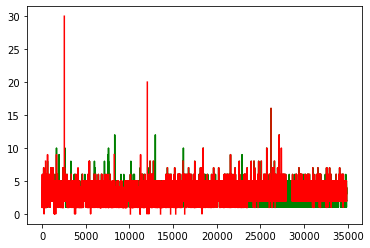

In [70]:
plt.plot(df.Rooms,c='g')
plt.plot(df.Bedroom2,c='r')

In [10]:
df.drop(columns=['Address','Lattitude','Longtitude','Bedroom2'],axis=1,inplace=True) 

In [72]:
df.head(1)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0


In [109]:
df.shape

(34852, 19)

In [110]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname', 'Propertycount', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
### filling null values

In [11]:
df['BuildingArea']=df['BuildingArea'].fillna(df['BuildingArea'].mean())

In [12]:
df['YearBuilt']=df['YearBuilt'].fillna(df['YearBuilt'].mode()[0])

In [13]:
df['Price'].fillna(df.groupby('Rooms')['Price'].transform('mean'),inplace=True)
df['Car'].fillna(round(df.groupby('Rooms')['Car'].transform('mean')),inplace=True)
df['Bathroom'].fillna(round(df.groupby('Rooms')['Bathroom'].transform('mean')),inplace=True)
df['Landsize'].fillna(round(df.groupby('Rooms')['Landsize'].transform('mean')),inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
day              0
month            0
year             0
dtype: int64

In [ ]:
### changing data types (float to int)

In [16]:
df['Price'] = df['Price'].astype(float).astype(int)
df['Postcode'] = df['Postcode'].astype(float).astype(int)
df['Bathroom'] = df['Bathroom'].astype(float).astype(int)
df['Car'] = df['Car'].astype(float).astype(int)
df['YearBuilt'] =  df['YearBuilt'].astype(float).astype(int)
df['Propertycount'] = df['Propertycount'].astype(float).astype(int)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34852 entries, 0 to 34856
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34852 non-null  object 
 1   Rooms          34852 non-null  int64  
 2   Type           34852 non-null  object 
 3   Price          34852 non-null  int32  
 4   Method         34852 non-null  object 
 5   SellerG        34852 non-null  object 
 6   Date           34852 non-null  object 
 7   Distance       34852 non-null  float64
 8   Postcode       34852 non-null  int32  
 9   Bathroom       34852 non-null  int32  
 10  Car            34852 non-null  int32  
 11  Landsize       34852 non-null  float64
 12  BuildingArea   34852 non-null  float64
 13  YearBuilt      34852 non-null  int32  
 14  CouncilArea    34852 non-null  object 
 15  Regionname     34852 non-null  object 
 16  Propertycount  34852 non-null  int32  
dtypes: float64(3), int32(6), int64(1), object(7)
memor

# Exploratory Data Analysis (EDA)

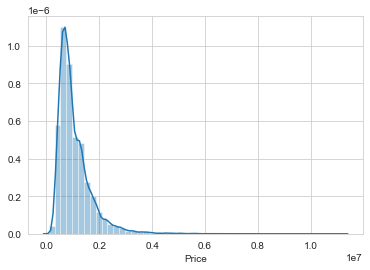

In [11]:
sns.distplot(df['Price'])

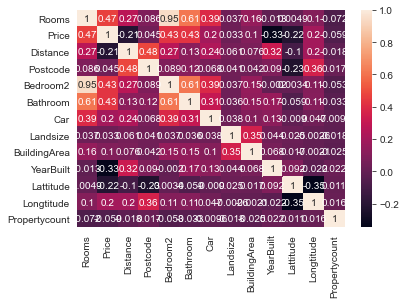

In [12]:
sns.heatmap(df.corr(), annot=True)

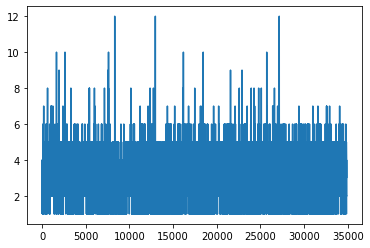

In [111]:
plt.plot(df.Rooms)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002587C7AFA30>,
      dtype=object)

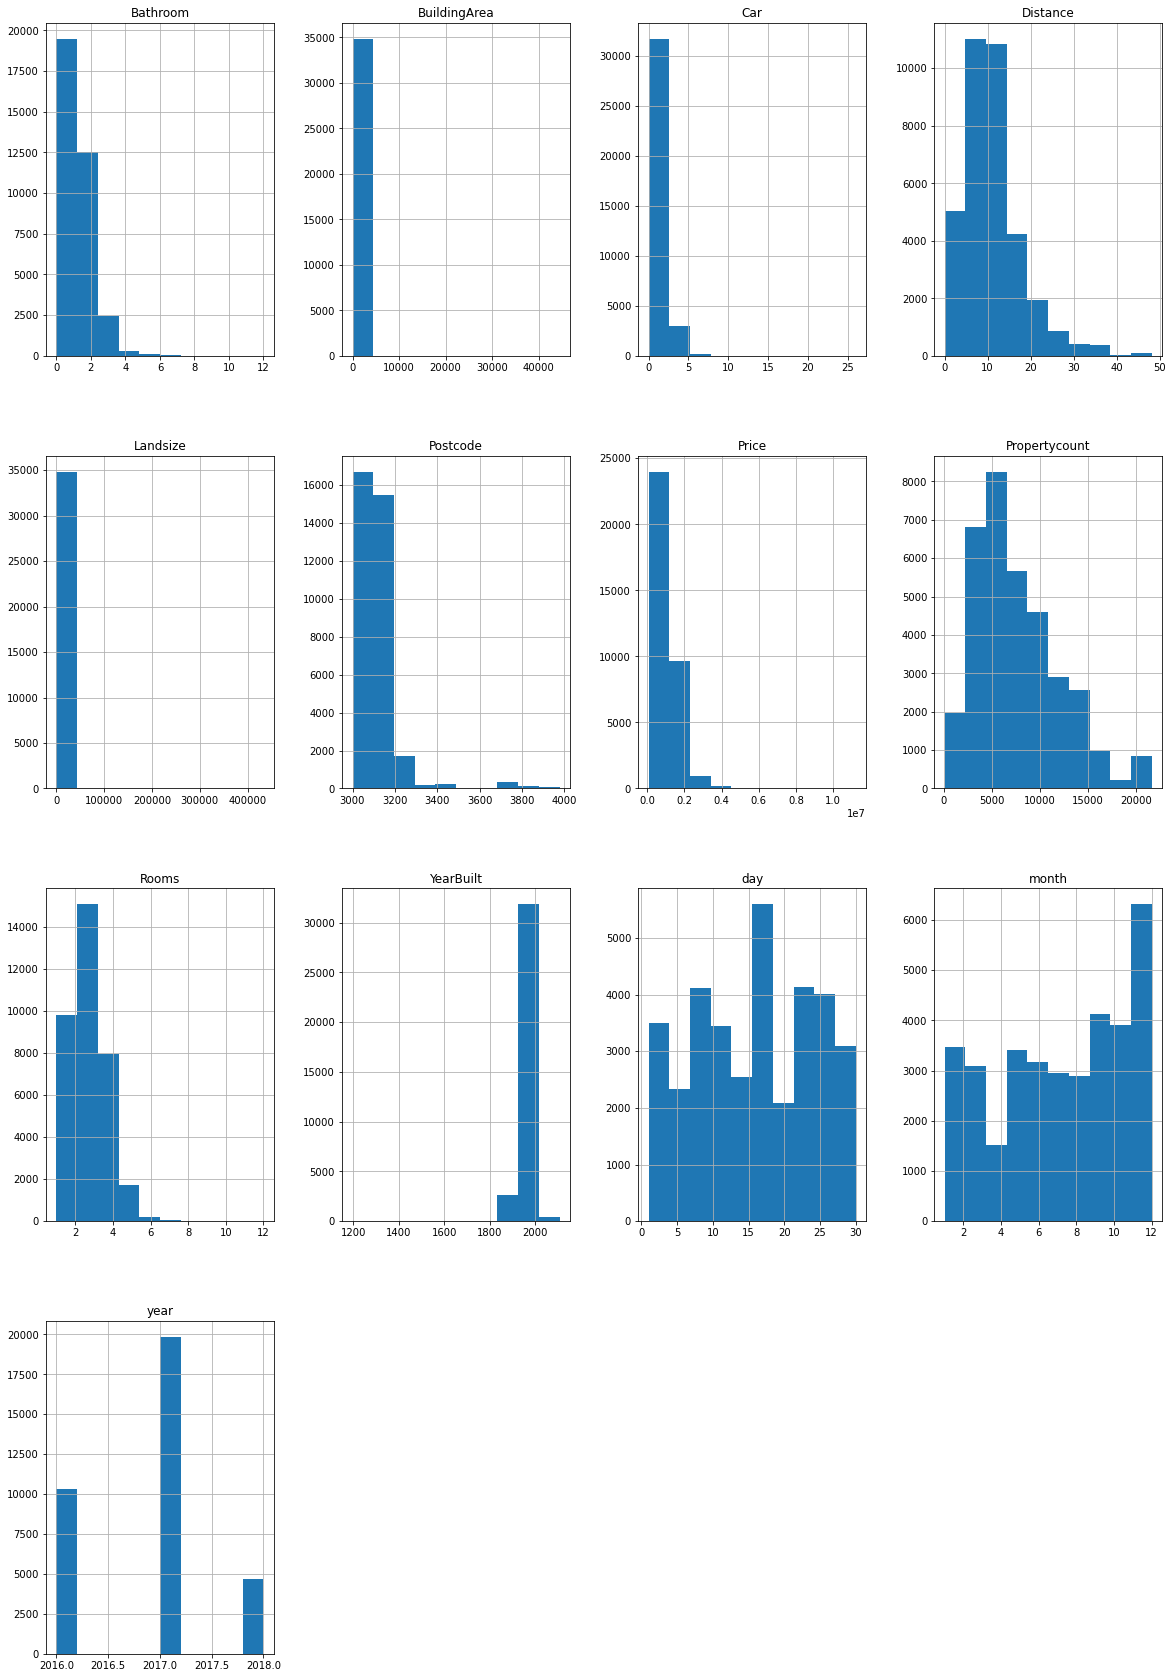

In [112]:
df.hist(figsize=(20,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002587DF17460>]],
      dtype=object)

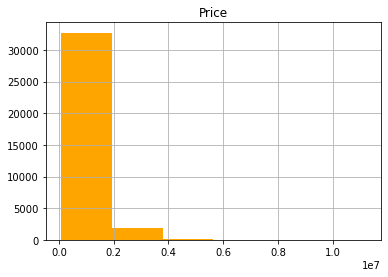

In [116]:
df.hist(column='Price',bins=6,color='orange')

In [4]:
sns.barplot(df.Rooms,df.Price)

NameError: name 'df' is not defined

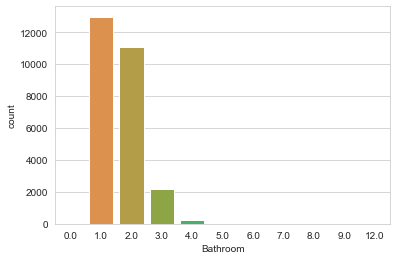

In [7]:
sns.countplot(x="Bathroom", data=df)

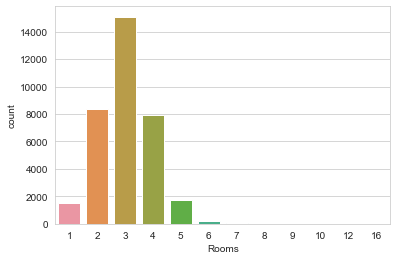

In [8]:
sns.countplot(x="Rooms", data=df)

(array([3.1694e+04, 2.9570e+03, 1.6500e+02, 3.1000e+01, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <a list of 10 Patch objects>)

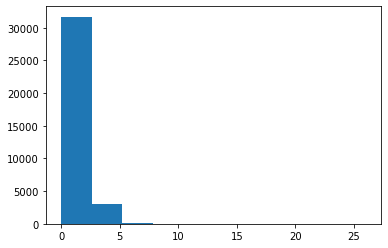

In [130]:
plt.hist(df.Car)

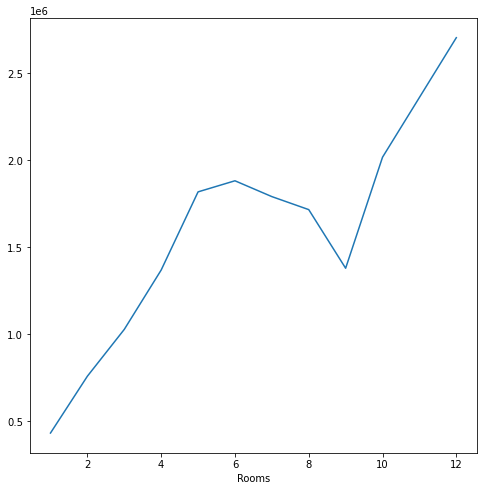

In [143]:
df.groupby('Rooms')['Price'].mean().plot(figsize=())

In [22]:
 df.to_csv('melbourne_housing_clean_data.csv' , index=True)


In [106]:
df.drop(columns=['BuildingArea','YearBuilt','day','month','year'],axis=1,inplace=True) 

In [107]:
df.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,759484,2.5,3067,1,1,126.0,4019,1,0,...,1,0,0,0,1,0,0,0,0,0
1,2,1480000,2.5,3067,1,1,202.0,4019,1,0,...,1,0,0,0,1,0,0,0,0,0
2,2,1035000,2.5,3067,1,0,156.0,4019,1,0,...,1,0,0,0,1,0,0,0,0,0
3,3,1028499,2.5,3067,2,1,0.0,4019,1,0,...,1,0,0,0,1,0,0,0,0,0
4,3,1465000,2.5,3067,2,0,134.0,4019,1,0,...,1,0,0,0,1,0,0,0,0,0


In [108]:
df = pd.get_dummies(df)

In [109]:
df.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,759484,2.5,3067,1,1,126.0,4019,1,0,...,1,0,0,0,1,0,0,0,0,0
1,2,1480000,2.5,3067,1,1,202.0,4019,1,0,...,1,0,0,0,1,0,0,0,0,0
2,2,1035000,2.5,3067,1,0,156.0,4019,1,0,...,1,0,0,0,1,0,0,0,0,0
3,3,1028499,2.5,3067,2,1,0.0,4019,1,0,...,1,0,0,0,1,0,0,0,0,0
4,3,1465000,2.5,3067,2,0,134.0,4019,1,0,...,1,0,0,0,1,0,0,0,0,0


In [110]:
df.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'Suburb_Abbotsford', 'Suburb_Aberfeldie',
       ...
       'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object', length=799)

In [111]:
df.shape

(34852, 799)

# Split data to Train and Test


In [112]:
x = df.drop('Price', axis=1)

In [113]:
y = df.Price

In [114]:
x.shape , y.shape

((34852, 798), (34852,))

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=50)

In [116]:
x_train.shape

(27881, 798)

In [117]:
x_test.shape

(6971, 798)

# Fit the model

In [118]:
model = LinearRegression()

In [119]:
model.fit(x_train,y_train)

LinearRegression()

In [120]:
prediction = model.predict(x_test)

In [121]:
prediction

array([1668027.70490288,  907812.07839763,  849793.09386792, ...,
       1236696.77710638,  876780.06142225,  971200.70152878])

In [122]:
model.score(x_test,y_test)

0.5549937211076901

In [123]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.5549937211076901


# Model Evaluation

In [132]:
from sklearn.metrics import mean_squared_error,r2_score


In [134]:
mse=mean_squared_error(y_test,prediction)
r2 = r2_score(y_test,prediction) 

In [144]:
print('Intercept:', model.intercept_) 
print('Root mean squared error: ', mse) 
print('R2 score: ', r2) 

Intercept: 166192.5675498827
Root mean squared error:  158625142481.48242
R2 score:  0.5549937211076901


In [124]:

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [125]:
#To ignore warning
import warnings
warnings.filterwarnings('ignore')

# Lasso Reg

In [126]:
lasso_reg = Lasso(alpha=50, max_iter=100)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100)

In [127]:
lasso_reg.score(x_train,y_train)


0.5877537245922972

In [128]:
lasso_reg.score(x_train,y_train)

0.5877537245922972

# Ridge Reg

In [129]:
ridge_reg= Ridge(alpha=50, max_iter=100,)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100)

In [130]:
ridge_reg.score(x_test, y_test)

0.5535505073157494

In [131]:
ridge_reg.score(x_train,y_train)

0.582274516632165